# Rain Harvesting in Mexico City

### This notebook is for the Capstone Project of IBM Data Science Certificate in Coursera

#### The introduction of the problem is written here: https://github.com/erictellez/IBM-data-science-capstone-project

First we need to download the database or to access it trough an URL.

After that we need to clean the database.

### 0. Import libraries and update conda 

In [4]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
%%capture
! pip install seaborn

In [9]:
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
import seaborn as sns
import matplotlib
import datetime

#!conda update -n base -c defaults conda  # this line is to update conda but it seems is not working
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')
print('Folium imported.')


CondaValueError: invalid package specification: #

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Libraries imported.
Folium imported.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


# 1. Download and explore the dataset

The data is grouped by month so we need to concatenate all the archives.

In [44]:
df1 = pd.read_csv('Datos_LOSREYES_Inten_201901.csv')
df2 = pd.read_csv('Datos_LOSREYES_Inten_201902.csv')
df3 = pd.read_csv('Datos_LOSREYES_Inten_201903.csv')
df4 = pd.read_csv('Datos_LOSREYES_Inten_201904.csv')
df5 = pd.read_csv('Datos_LOSREYES_Inten_201905.csv')
df6 = pd.read_csv('Datos_LOSREYES_Inten_201906.csv')
df7 = pd.read_csv('Datos_LOSREYES_Inten_201907.csv')
df8 = pd.read_csv('Datos_LOSREYES_Inten_201908.csv')
df9 = pd.read_csv('Datos_LOSREYES_Inten_201909.csv')
df10 = pd.read_csv('Datos_LOSREYES_Inten_201910.csv')
df11 = pd.read_csv('Datos_LOSREYES_Inten_201911.csv')
df12 = pd.read_csv('Datos_LOSREYES_Inten_201912.csv')


frames = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12]

df = pd.concat(frames)

df.head()

,Estación,Fecha/hora,Intensidad [mm/h],Acumulada [mm],Reflectividad [dB],Visibilidad [m],Número de gotas,Energía Cinética [KJ]
0,LOSREYES,2019/01/30 17:20,0.0,12.62,-9.999,20000.0,0.0,0.0
1,LOSREYES,2019/01/30 17:21,0.0,12.62,-9.999,20000.0,0.0,0.0
2,LOSREYES,2019/01/30 17:22,0.0,12.62,-9.999,20000.0,0.0,NaN
3,LOSREYES,2019/01/30 17:23,0.0,12.62,-9.999,20000.0,0.0,0.0
4,LOSREYES,2019/01/30 17:24,0.0,12.62,-9.999,20000.0,0.0,0.0


In [31]:
#The database is not clean enough. The first n rows in column Acumulada have a number that is not zero and it should be. 
#Fortunaletely there is no other 122.60 number in the database, so its easey just to replace this number.
# I need a piece of code to clean this values.
#dacmex['Acumulada [mm]'].replace(to_replace=[122.60], value=[0.0],inplace=True)
#df.head()

### 1.1 Convert to date time object 

In [45]:
df['Fecha/hora'] = pd.to_datetime(df['Fecha/hora'])
df.head()

,Estación,Fecha/hora,Intensidad [mm/h],Acumulada [mm],Reflectividad [dB],Visibilidad [m],Número de gotas,Energía Cinética [KJ]
0,LOSREYES,2019-01-30 17:20:00,0.0,12.62,-9.999,20000.0,0.0,0.0
1,LOSREYES,2019-01-30 17:21:00,0.0,12.62,-9.999,20000.0,0.0,0.0
2,LOSREYES,2019-01-30 17:22:00,0.0,12.62,-9.999,20000.0,0.0,NaN
3,LOSREYES,2019-01-30 17:23:00,0.0,12.62,-9.999,20000.0,0.0,0.0
4,LOSREYES,2019-01-30 17:24:00,0.0,12.62,-9.999,20000.0,0.0,0.0


In [46]:
df.tail()

,Estación,Fecha/hora,Intensidad [mm/h],Acumulada [mm],Reflectividad [dB],Visibilidad [m],Número de gotas,Energía Cinética [KJ]
42529,LOSREYES,2019-12-31 23:47:00,0.0,0.16,-9.999,20000.0,0.0,0.0
42530,LOSREYES,2019-12-31 23:48:00,0.0,0.16,-9.999,20000.0,0.0,0.0
42531,LOSREYES,2019-12-31 23:49:00,0.0,0.16,-9.999,20000.0,0.0,0.0
42532,LOSREYES,2019-12-31 23:50:00,0.0,0.16,-9.999,20000.0,0.0,0.0
42533,LOSREYES,2019-12-31 23:51:00,0.0,0.16,-9.999,20000.0,0.0,0.0


Convert the actual datetime to other time, because I think it would be better to measure from 7am to 7am. During the night the rain could pour while sleeping.

In [47]:
df['Fecha/hora'] = df['Fecha/hora'] - datetime.timedelta(hours=7)
df.head()

,Estación,Fecha/hora,Intensidad [mm/h],Acumulada [mm],Reflectividad [dB],Visibilidad [m],Número de gotas,Energía Cinética [KJ]
0,LOSREYES,2019-01-30 10:20:00,0.0,12.62,-9.999,20000.0,0.0,0.0
1,LOSREYES,2019-01-30 10:21:00,0.0,12.62,-9.999,20000.0,0.0,0.0
2,LOSREYES,2019-01-30 10:22:00,0.0,12.62,-9.999,20000.0,0.0,NaN
3,LOSREYES,2019-01-30 10:23:00,0.0,12.62,-9.999,20000.0,0.0,0.0
4,LOSREYES,2019-01-30 10:24:00,0.0,12.62,-9.999,20000.0,0.0,0.0


In [48]:
df.dtypes

Estación                         object
Fecha/hora               datetime64[ns]
Intensidad [mm/h]               float64
Acumulada [mm]                  float64
Reflectividad [dB]              float64
Visibilidad [m]                 float64
Número de gotas                 float64
Energía Cinética [KJ]           float64
dtype: object

From here we can see that each measurement is made every minute of the month and we need the amount of rain every day. 
It would be the best form of processing.

We need to sum all the measurementes of each minute in one day in order to plot the amount of water per day.
Since the measurement of intensity is in units of mm/h, we need to divide by 60 to get the proper sum of total rain each day in mm.

In [49]:
Acumuladapordia=df['Intensidad [mm/h]'].groupby(df['Fecha/hora'].dt.to_period('D')).sum() #to change the frecuency in to_period('W') you need to change the letter W meaning weak for D days
APD=Acumuladapordia/60;
#df['Intensidad [mm/h]'].groupby(df['Fecha/hora'].dt.to_period('D')).sum().plot(kind='bar')

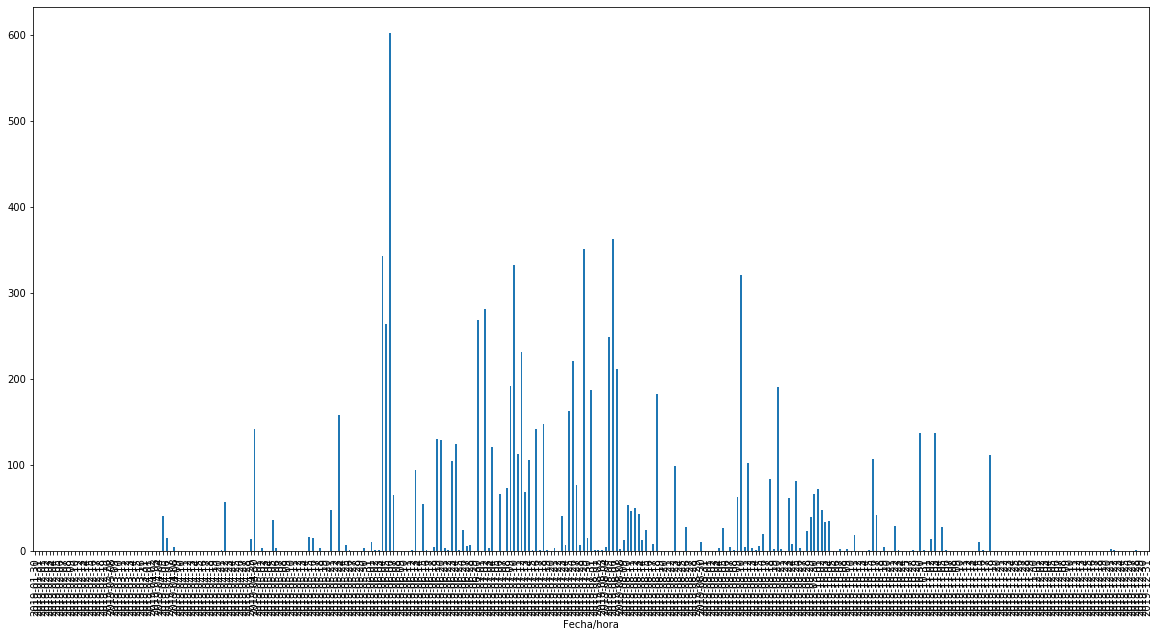

In [50]:
roofarea=16;
litros=APD/1000*1000*(roofarea)
litros.plot(kind='bar',figsize=(20,10)) #It seems that the graph is not good enough. I need to plot it better.

In [57]:
#APD is the amount of rain each day and by multiplying that times the area of the ceiling we get the liters we can harvest of the rain
print(litros) #The last number is the area of the ceiling
print('Litros totales=',sum(litros))
print('Promedio anual=',sum(litros)/52)
print('Promedio semestral 26 semanas (temporada de lluvias)=',sum(litros)/26)

k=43
count = 0
for i in litros : 
    if i > k : 
        count = count + 1

print('Days with more than 43 liters =', count)

Fecha/hora
2019-01-30      0.000000
2019-01-31      0.000000
2019-02-01      0.000000
2019-02-02      0.000000
2019-02-03      0.000000
2019-02-04      0.000000
2019-02-05      0.000000
2019-02-06      0.000000
2019-02-07      0.000000
2019-02-08      0.000000
2019-02-09      0.000000
2019-02-10      0.000000
2019-02-12      0.000000
2019-02-13      0.000000
2019-02-14      0.000000
2019-02-15      0.000000
2019-02-16      0.000000
2019-02-17      0.000000
2019-02-18      0.000000
2019-02-19      0.000000
2019-02-20      0.000000
2019-03-08      0.000000
2019-03-09      0.000000
2019-03-10      0.000000
2019-03-11      0.000000
2019-03-12      0.000000
2019-03-13      0.000000
2019-03-14      0.000000
2019-03-15      0.000000
2019-03-16      0.000000
2019-03-31      0.000000
2019-04-01      0.000000
2019-04-02      0.000000
2019-04-03      0.000000
2019-04-04      0.000000
2019-04-05     39.782133
2019-04-06     14.295467
2019-04-07      0.000000
2019-04-08      4.544800
2019-04-09    

<h2 id="discriptive_statistics">2. Descriptive Statistical Analysis</h2>

We need to calculate the water usage per person each day.
We need to 

300 litros a la semana de Ana (4 o 5 personas en la casa)
500 litros a la semana de Isa 

1
Seguro
Certeza de obtener el agua
Adaptabilidad de insfraestructuras pequeñas
Instalar y desistalar la solución
Mecanismo para medir la cantidad de agua

2 reuso

3
Modelo de provisiónd de agua segura: 
opción do it yourself

Calculadora de Cántaro Azul: https://capitalsustentable.shinyapps.io/calculadora/

In [22]:
df.describe()

,Intensidad [mm/h],Acumulada [mm],Reflectividad [dB],Visibilidad [m],Número de gotas,Energía Cinética [KJ]
count,44579.000000,44579.000000,44579.000000,44579.000000,44579.000000,44579.000000
mean,0.300296,93.001430,-7.078582,19469.552906,25.428363,7.827381
std,3.032025,67.487869,9.776780,2655.444161,135.031099,104.177086
min,0.000000,0.000000,-9.999000,199.000000,0.000000,0.000000
25%,0.000000,39.570000,-9.999000,20000.000000,0.000000,0.000000
50%,0.000000,78.580000,-9.999000,20000.000000,0.000000,0.000000
75%,0.000000,125.840000,-9.999000,20000.000000,0.000000,0.000000
max,151.377000,223.960000,61.101000,20000.000000,4351.000000,5678.430000


In [10]:
df.corr()

,Intensidad [mm/h],Acumulada [mm],Reflectividad [dB],Visibilidad [m],Número de gotas,Energía Cinética [KJ]
Intensidad [mm/h],1.000000,0.027909,0.505625,-0.575334,0.745237,0.976842
Acumulada [mm],0.027909,1.000000,0.049916,-0.059188,0.058995,0.024055
Reflectividad [dB],0.505625,0.049916,1.000000,-0.785852,0.725338,0.416762
Visibilidad [m],-0.575334,-0.059188,-0.785852,1.000000,-0.862743,-0.461731
Número de gotas,0.745237,0.058995,0.725338,-0.862743,1.000000,0.632548
Energía Cinética [KJ],0.976842,0.024055,0.416762,-0.461731,0.632548,1.000000


In [11]:
df['Intensidad [mm/h]'].value_counts()
df['Intensidad [mm/h]'].unique()

array([0.   , 0.283, 0.323, ..., 5.801, 3.772, 1.661])

In [9]:
# Function to merge dataframes. Because the archives are all by month 
# df = pd.concat([df, dummy_variable_1], axis=1)

### 1.1 Evaluating missing values

In [22]:
missing_data = df.isnull()
missing_data.head(5)

,Estación,Fecha/hora,Intensidad [mm/h],Acumulada [mm],Reflectividad [dB],Visibilidad [m],Número de gotas,Energía Cinética [KJ]
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [23]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Estación
False    44579
Name: Estación, dtype: int64

Fecha/hora
False    44579
Name: Fecha/hora, dtype: int64

Intensidad [mm/h]
False    44579
Name: Intensidad [mm/h], dtype: int64

Acumulada [mm]
False    44579
Name: Acumulada [mm], dtype: int64

Reflectividad [dB]
False    44579
Name: Reflectividad [dB], dtype: int64

Visibilidad [m]
False    44579
Name: Visibilidad [m], dtype: int64

Número de gotas
False    44579
Name: Número de gotas, dtype: int64

Energía Cinética [KJ]
False    44579
Name: Energía Cinética [KJ], dtype: int64



In [24]:
df.tail()

,Estación,Fecha/hora,Intensidad [mm/h],Acumulada [mm],Reflectividad [dB],Visibilidad [m],Número de gotas,Energía Cinética [KJ]
44574,SACMEX,2019/07/31 23:54,0.0,223.96,-9.999,20000,0,0.0
44575,SACMEX,2019/07/31 23:55,0.0,223.96,-9.999,20000,0,0.0
44576,SACMEX,2019/07/31 23:56,0.0,223.96,-9.999,20000,0,0.0
44577,SACMEX,2019/07/31 23:57,0.0,223.96,-9.999,19211,0,0.0
44578,SACMEX,2019/07/31 23:58,0.0,223.96,-9.999,19842,0,0.0


## Bining

In [58]:
df["Intensidad [mm/h]"]=df["Intensidad [mm/h]"].astype(int, copy=True) 
litros

Fecha/hora
2019-01-07/2019-01-13      62.65200
2019-01-14/2019-01-20       0.77000
2019-01-21/2019-01-27       0.45250
2019-01-28/2019-02-03       0.00000
2019-02-04/2019-02-10       0.00000
2019-02-11/2019-02-17       3.08950
2019-02-18/2019-02-24       0.51200
2019-02-25/2019-03-03       0.00000
2019-03-04/2019-03-10       0.00625
2019-03-11/2019-03-17       0.06400
2019-03-18/2019-03-24       0.88175
2019-03-25/2019-03-31       0.00000
2019-04-01/2019-04-07       8.38275
2019-04-08/2019-04-14      18.78925
2019-04-15/2019-04-21      11.72200
2019-04-22/2019-04-28       1.26800
2019-04-29/2019-05-05      13.82000
2019-05-06/2019-05-12       2.45450
2019-05-13/2019-05-19     525.50550
2019-05-20/2019-05-26       0.00000
2019-05-27/2019-06-02     167.55525
2019-06-03/2019-06-09     721.09550
2019-06-10/2019-06-16     168.14625
2019-06-17/2019-06-23     689.99875
2019-06-24/2019-06-30     176.69575
2019-07-01/2019-07-07     449.51175
2019-07-08/2019-07-14     683.46300
2019-07-15/2019-0

Text(0.5, 1.0, 'Litros por día')

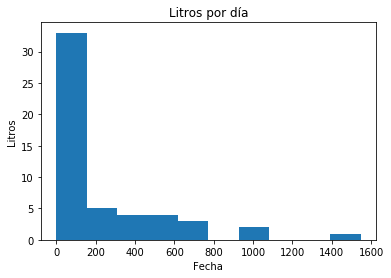

In [59]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(litros)

# set x/y labels and plot title
plt.pyplot.xlabel("Fecha")
plt.pyplot.ylabel("Litros")
plt.pyplot.title("Litros por día")

In [67]:
bins = np.linspace(min(df["Intensidad [mm/h]"]), max(df["Intensidad [mm/h]"]), 20)
bins

array([  0.        ,   7.94736842,  15.89473684,  23.84210526,
        31.78947368,  39.73684211,  47.68421053,  55.63157895,
        63.57894737,  71.52631579,  79.47368421,  87.42105263,
        95.36842105, 103.31578947, 111.26315789, 119.21052632,
       127.15789474, 135.10526316, 143.05263158, 151.        ])

In [61]:
group_names = ['Low', 'Medium', 'High']

In [82]:
#df['intensidad-binned'] = pd.cut(df['Intensidad [mm/h]'], bins, labels=group_names, include_lowest=True )
df['intensidad-binned'] = pd.cut(df['Intensidad [mm/h]'], bins, include_lowest=True )
df[['Intensidad [mm/h]','intensidad-binned']].head(20)

ValueError: Bin labels must be one fewer than the number of bin edges

In [70]:
df["intensidad-binned"].value_counts()

(-0.001, 7.947]       430471
(7.947, 15.895]          466
(15.895, 23.842]         233
(23.842, 31.789]         119
(31.789, 39.737]          69
(39.737, 47.684]          55
(47.684, 55.632]          37
(55.632, 63.579]          28
(63.579, 71.526]          23
(79.474, 87.421]          11
(71.526, 79.474]           9
(87.421, 95.368]           4
(95.368, 103.316]          4
(103.316, 111.263]         3
(111.263, 119.211]         3
(143.053, 151.0]           2
(135.105, 143.053]         1
(119.211, 127.158]         1
(127.158, 135.105]         1
Name: intensidad-binned, dtype: int64

ValueError: shape mismatch: objects cannot be broadcast to a single shape

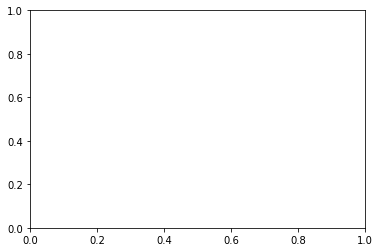

In [74]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["intensidad-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Intensity")
plt.pyplot.ylabel("count")
plt.pyplot.title("Intensity bins")

# 2. Histogram

In [75]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df['Intensidad [mm/h]'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[430937    337    127     67     39     14      8      7      1      3]
[  0.   15.1  30.2  45.3  60.4  75.5  90.6 105.7 120.8 135.9 151. ]


AttributeError: module 'matplotlib' has no attribute 'title'

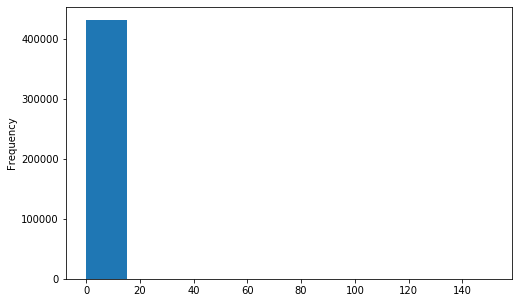

In [76]:
df['Intensidad [mm/h]'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of rain intensity in July 2019') # add a title to the histogram
plt.ylabel('counts') # add y-label
plt.xlabel('Intensity [mm/h]') # add x-label

plt.show()

In case the edges of the plot don't match with the edges of histogram

AttributeError: module 'matplotlib' has no attribute 'title'

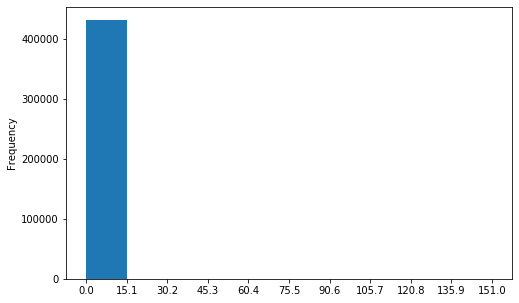

In [79]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df['Intensidad [mm/h]'])

df['Intensidad [mm/h]'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

### 3. Density-based clustering
##### Visualization of map

In [ ]:
!conda install -c anaconda basemap

In [ ]:
!conda install -c conda-forge  basemap==1.3.0  matplotlib==2.2.2  -y

In [1]:
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

C:\Users\eric\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
from mpl_toolkits.basemap import Basemap
from pylab import rcParams
rcParams['figure.figsize'] = (14,10)

#For Mexico City
llon=-102
ulon=-98
llat=18
ulat=20

pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

#Visualization1
for index,row in pdf.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()

KeyError: 'PROJ_LIB'

### Visualization of clusters based on location and precipitation with Density-based clustering

In [3]:
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))

NameError: name 'Basemap' is not defined

<h2 id="discriptive_statistics">4. Foursquare API connection</h2>

Define credentials

In [ ]:
CLIENT_ID = 'V5MHJVTMGUZ33Q3214CZOGVES1SPHEP2PAXKTA32KPLLKSMN' # your Foursquare ID
CLIENT_SECRET = 'BQAN0YAAB3LJ4C1QE3ZIZTK5T3DS45RNT2KBGTVQH5QDZ2MW' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>foursquare_agent</em>, as shown below.

In [ ]:
address = 'Madero, Ciudad de Mexico'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

## 4.1 Search for a specific venue category
> `https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&query=`**QUERY**`&radius=`**RADIUS**`&limit=`**LIMIT**

In [ ]:
search_query = 'Hotel'
radius = 500
print(search_query + ' .... OK!')

In [ ]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

In [ ]:
results = requests.get(url).json()
results

In [ ]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

#### Define information of interest and filter dataframe

In [ ]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

In [ ]:
dataframe_filtered.name

In [ ]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

## 4.2 Explore a location
> `https://api.foursquare.com/v2/venues/`**explore**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&limit=`**LIMIT**

In [ ]:
#tengo que poner las coordenadas de la ciudad de mexico o de sacmex
latitude = 40.715337
longitude = -74.008848

In [ ]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

In [ ]:
import requests

In [ ]:
results = requests.get(url).json()
'There are {} around Ecco restaurant.'.format(len(results['response']['groups'][0]['items']))

In [ ]:
items = results['response']['groups'][0]['items']
items[0]

In [ ]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

In [61]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco


# add Ecco as a red circle mark
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Ecco',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

## Define API for Datos de Mexico

In [ ]:
#!/usr/bin/env python
import urllib2
import urllib
import json
import pprint

# Put the details of the dataset we're going to create into a dict.
dataset_dict = {
    'name': 'my_dataset_name',
    'notes': 'A long description of my dataset',
}

# Use the json module to dump the dictionary to a string for posting.
data_string = urllib.quote(json.dumps(dataset_dict))

# We'll use the package_create function to create a new dataset.
request = urllib2.Request(
    'http://www.my_ckan_site.com/api/action/package_create')

# Creating a dataset requires an authorization header.
# Replace *** with your API key, from your user account on the CKAN site
# that you're creating the dataset on.
request.add_header('Authorization', '***')

# Make the HTTP request.
response = urllib2.urlopen(request, data_string)
assert response.code == 200

# Use the json module to load CKAN's response into a dictionary.
response_dict = json.loads(response.read())
assert response_dict['success'] is True

# package_create returns the created package as its result.
created_package = response_dict['result']
pprint.pprint(created_package)